### Importing all required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,r2_score,mean_squared_error,accuracy_score
from warnings import simplefilter
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import zscore
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn import tree
from os import system
simplefilter('ignore')

C:\Users\epopo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
### Displaying Top 5 records from the dataset
df=pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## a) UNIVARIATE ANALYSIS

### Printing the shape of the dataset

In [3]:
print(df.shape)
print(f'Dataset has {df.shape[0]} Rows and {df.shape[1]} columns')

(1030, 9)
Dataset has 1030 Rows and 9 columns


### Displaying the datatype information of the dataset

In [4]:
df.info()    ### We have all input variables as float,int datatype only.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


- Hence we could see that all variables are numeric datatypes (float and integer )

### Displaying 5 Point Summary information from the dataset

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


- This 5 point summary matrix gives details about mean, standard deviation , quantiles, minimum and maximum values of all variables.
- Hence, we will find the range of values of each attributes separately and merge with this as dataframe

In [6]:
a=df.describe().T
basic_analysis=pd.DataFrame(a)
cols=df.columns
a=[]
for i in cols:
    a.append(df[i].max()-df[i].min())
a=pd.DataFrame(pd.Series(a))
basic_analysis['Range of values']=a.values
basic_analysis

,count,mean,std,min,25%,50%,75%,max,Range of values
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,438.00
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,359.40
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,200.10
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,125.20
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,32.20
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,344.00
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,398.60
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,364.00
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,80.27


- Therefore , from this basic_analysis dataframe we could see Mean,std,Min,Q1(25%),Median(50%),Q3(75%),max,Range of values
of all attributes.

### Checking for any Missing Values

In [7]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

- There are No NaN or Null values.

In [8]:
### Taking backup 1
df_bkp=df.copy(deep=True)

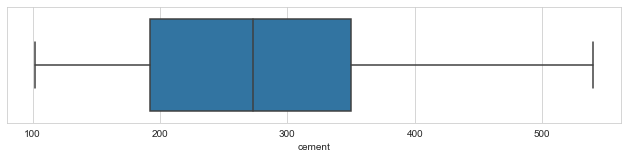

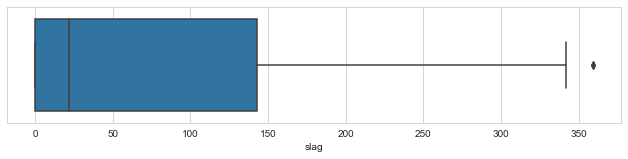

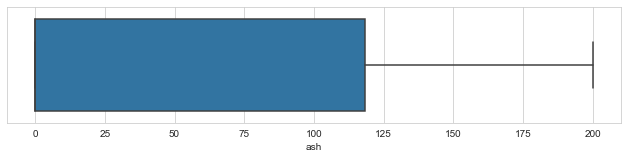

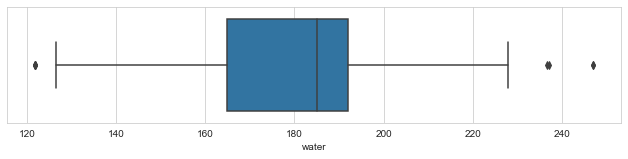

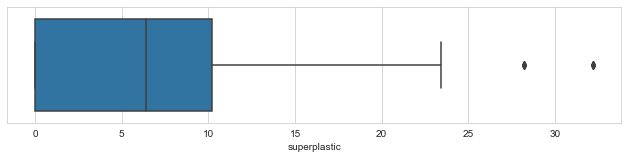

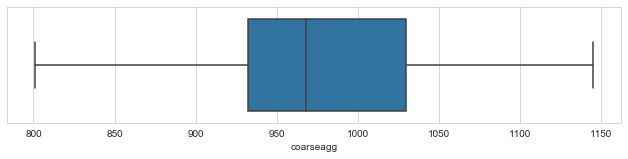

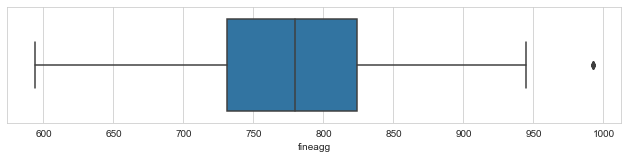

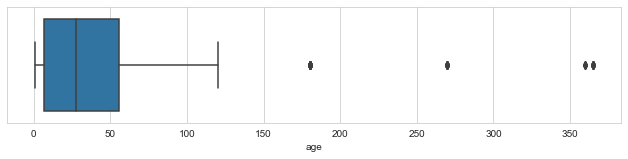

In [9]:
j=1
for i in df.columns:
    if i != 'strength':
        sns.set_style(style='whitegrid')
        plt.figure(figsize=(11,20))
        plt.subplot(8,1,j)
        sns.boxplot(df[i])
        j+=1

- From boxplot, we could see Outlier presence in slag,water,superplastic,fineagg,age attributes.

### To check the skewness of data , lets use distribution plot to verify it.

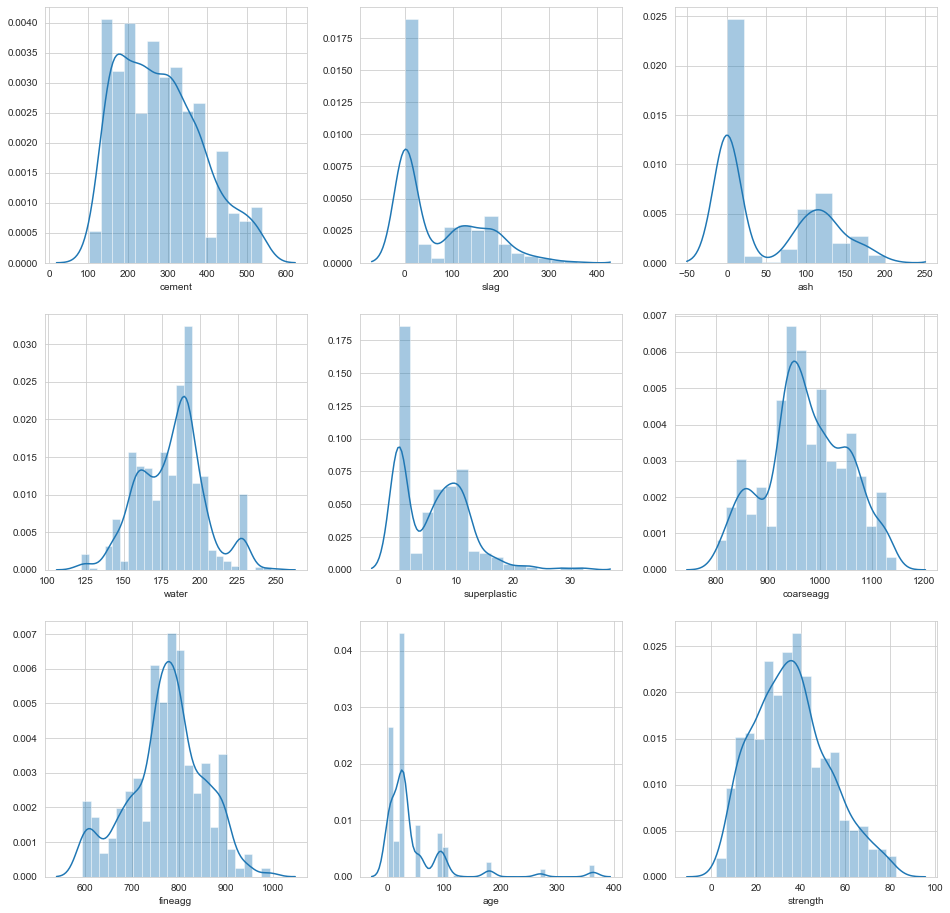

In [10]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

#### From distplot, we could get below insights
- cement --> Almost normaly distributed. 
- slag --> Two gausssians and positively skewed.
- ash --> Two gaussians and positively skewed.
- water --> Three guassians and slighly negatively skewed.
- superplastic --> Two gaussians and positively skewed.
- coarseagg --> Three guassians and almost normal distributed.
- fineagg --> Two guassians and almost normal distributed.
- age -->  Five guassians and positively skewed.
- strength --> Normaly distributed.

## b) Multivariate Analysis

### Pairplotting the Variables

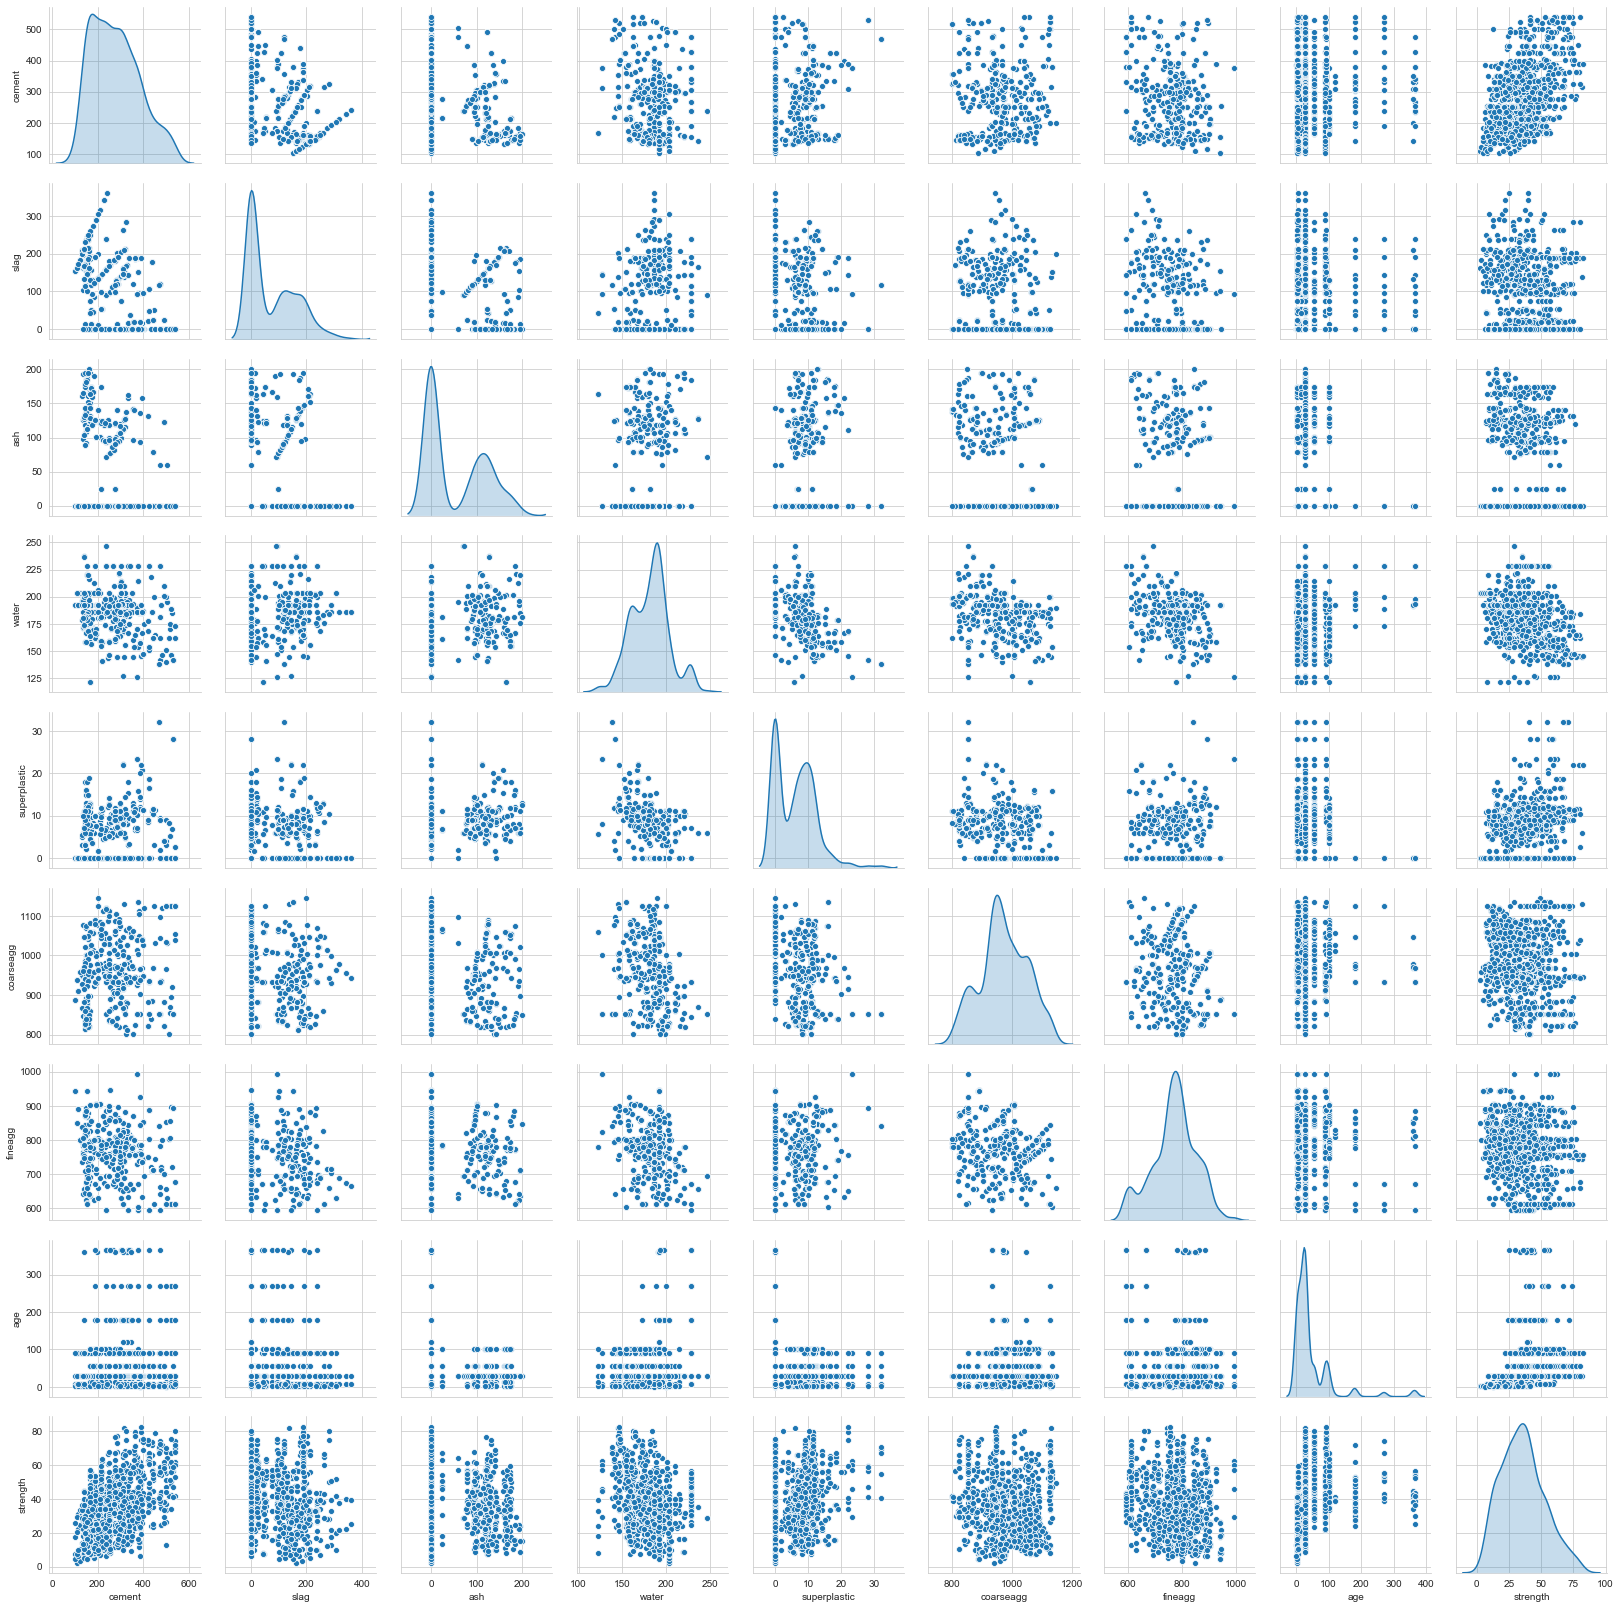

In [11]:
sns.pairplot(df,diag_kind='kde')

### Displaying the Correlation Matrix

In [12]:
df.corr().T

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


#### From pairplot and correlation matrix,we could find the below insights,
- cement vs ash, slag vs ash has some small negative correlation ( around -3.89 etc)
- ash vs superplastic has some small positive correlation (around 3.77 etc)
- water vs superplastic has negative correlation.( around -0.65 )
- whereas other attributes with each other has very small correlations.
#### Therefore we do this anlaysis inorder to eliminate the redundant attributes that are prone to errors,Since any of the attributes seems not to have strong correlation (around 0.9 etc ) we cannot do that technique over here.

#### From pairplot we also see the relationship with dependent variable
- strength has strong positive correlation with cement,superplastic,age
- whereas other attributes have low correaltion effect with the dependent variables. Hence these are not the good predictors for the model
#### Therefore we don't have any strong linear relationship with dependent variable we don't prefer Linear Model Algorithms.

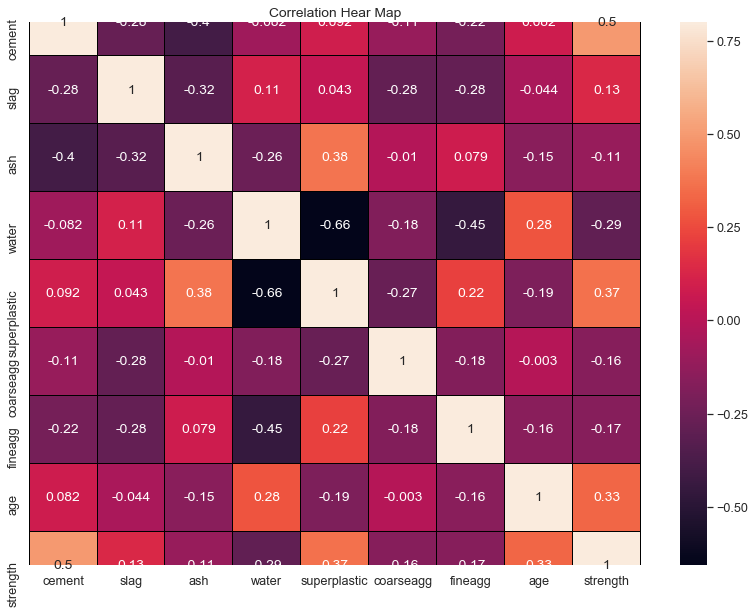

In [13]:
# Correlation heatmap
corr_df=df.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr_df, vmax=.8, linewidths=0.01,
            square=True,annot=True,linecolor="black")
plt.title('Correlation Hear Map');

### Removing the Outlier Presence

In [14]:
for i in df.columns:
    if i != 'strength':
        IQR1=df[i].quantile(0.75)+(1.5*(df[i].quantile(0.75)-df[i].quantile(0.25)))
        IQR2=df[i].quantile(0.25)-(1.5*(df[i].quantile(0.75)-df[i].quantile(0.25)))
        for k in df[i]:
            if k>IQR1:
                df[i]=df[i].replace(k,df[i].median())
            if k<IQR2:
                df[i]=df[i].replace(k,df[i].median())

- Replacing the Outliers Using Median

### Rechecking for Outlier Presence 

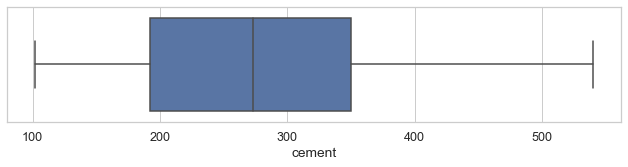

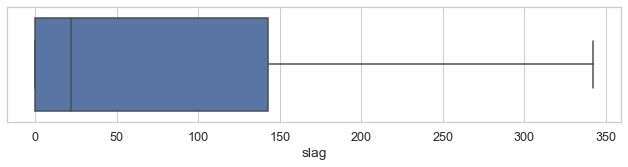

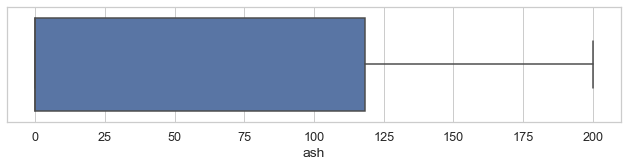

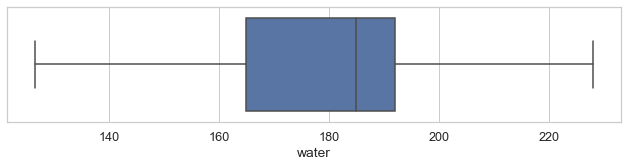

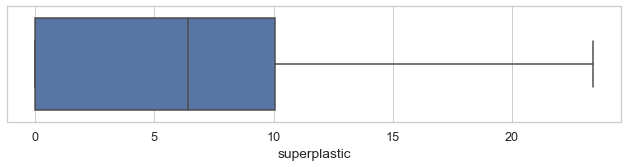

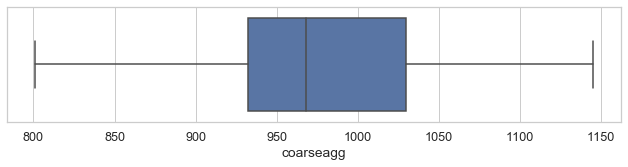

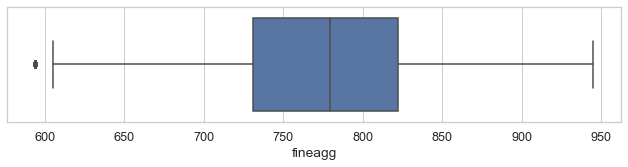

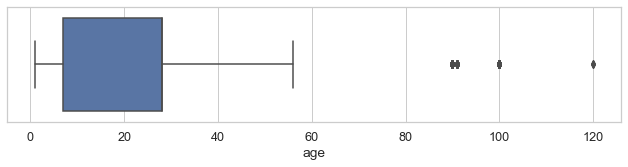

In [15]:
j=1
for i in df.columns:
    if i != 'strength':
        sns.set_style(style='whitegrid')
        plt.figure(figsize=(11,20))
        plt.subplot(8,1,j)
        sns.boxplot(df[i])
        j+=1

- Therfore, we use median treatment for replacing the Outliers.This is resulting in new Outliers.which can't be handled and can't further be removed.

## Feature Engineering 

### Scaling the dataframe

In [16]:
df_z =df.apply(zscore)

### Splitting the dataset into training and test datasets

In [17]:
X=df.drop('strength',axis=1)
y=df['strength']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)

- Hence further splitting the training dataset into training and test subset and having the original test set for final evaluation
- So , we will be using the subsets for training and evaluation 

In [18]:
x_train_d,x_test_d,y_train_d,y_test_d=train_test_split(x_train,y_train,test_size=.2,random_state=1)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train_d.shape)
print(y_train_d.shape)
print(x_test_d.shape)
print(y_test_d.shape)

(824, 8)
(824,)
(206, 8)
(206,)
(659, 8)
(659,)
(165, 8)
(165,)


### Linear Regression

In [20]:
lr=LinearRegression()
lr.fit(x_train_d,y_train_d)
print('Training score  : ',lr.score(x_train_d,y_train_d))
print('Test score  : ',lr.score(x_test_d,y_test_d))
y_pred_lr=lr.predict(x_test_d)

Training score  :  0.7084738344172228
Test score  :  0.7287366882823093


In [21]:
print('Mean square Error is :',mean_squared_error(y_test_d,y_pred_lr))

Mean square Error is : 79.90062694523135


### Implementing with Ridge and Lasso Technique

In [22]:
rr=Ridge()
rr.fit(x_train_d,y_train_d)
print('Training score :',rr.score(x_train_d,y_train_d))
print('Test score :',rr.score(x_test_d,y_test_d))

Training score : 0.7084738343491894
Test score : 0.7287370733578918


In [23]:
ll=Lasso()
ll.fit(x_train_d,y_train_d)
print('Training score :',ll.score(x_train_d,y_train_d))
print('Test score :',ll.score(x_test_d,y_test_d))

Training score : 0.7082627669321246
Test score : 0.7285679353941501


- Hence after regularizing the model with ridge and lasso , we could get see the same performance.
- So, Lets try to improve the performance using Polynomial Features

### Implementing using Polynomial Features

In [24]:
pp=PolynomialFeatures()
x_train_d_r=pp.fit_transform(x_train_d)
x_test_d_r=pp.fit_transform(x_test_d)
x_train_d_r.shape

(659, 45)

### Regularized Ridge

In [25]:
rr.fit(x_train_d_r,y_train_d)
print('Training score :',rr.score(x_train_d_r,y_train_d))
print('Test score :',rr.score(x_test_d_r,y_test_d))
y_pred_rr=rr.predict(x_test_d_r)

Training score : 0.8572879664033604
Test score : 0.8312660741928098


In [26]:
print('Mean Square Error is :',mean_squared_error(y_test_d,y_pred_rr))

Mean Square Error is : 49.7005893408674


### Regularized lasso

In [27]:
ll.fit(x_train_d_r,y_train_d)
print('Training score :',ll.score(x_train_d_r,y_train_d))
print('Training score :',ll.score(x_test_d_r,y_test_d))
y_pred_ll=ll.predict(x_test_d_r)

Training score : 0.8508035310072857
Training score : 0.8322890133566774


In [28]:
print('Mean Square Error is :',mean_squared_error(y_test_d,y_pred_ll))

Mean Square Error is : 49.39928254046637


- Therefore we could see that after regularizing the linear model, Mean Squared Error is reduced from 80 to 49
- Hence the performance has been increased from 72 % to 83 %.

In [29]:
### Feature Importance for Linear Model ( Coefficient and Intercepts ) 
print('Feature importances: \n',pd.DataFrame(lr.coef_,columns=['values'],index=x_train_d.columns))
print()
print('Intercept :',lr.intercept_)

Feature importances: 
                 values
cement        0.103672
slag          0.071738
ash           0.033790
water        -0.135465
superplastic  0.315495
coarseagg    -0.000314
fineagg      -0.006148
age           0.310262

Intercept : 17.18597112236307


## Support Vector Regressor

In [30]:
sr=SVR(kernel='linear')
sr.fit(zscore(x_train_d),y_train_d)
print('Training score :',sr.score(zscore(x_train_d),y_train_d))
print('Test score :',sr.score(zscore(x_test_d),y_test_d))
y_pred_sr=sr.predict(zscore(x_test_d))

Training score : 0.7042560558932085
Test score : 0.7234273307674843


In [31]:
print('Accuracy for Support Vector Regressor is :',r2_score(y_test_d,y_pred_sr))

Accuracy for Support Vector Regressor is : 0.7234273307674843


In [32]:
## Feature Importance
j=0
for i in cols:
    if i != 'strength':
        print(i,'-->',sr.coef_[0][j])
    j+=1

cement --> 10.742210590279235
slag --> 5.251838544410809
ash --> 1.8492425793035032
water --> -2.9692281904980744
superplastic --> 2.212363508662639
coarseagg --> -0.5732980297316097
fineagg --> -1.1212832876675698
age --> 8.194271816526278


## Decision Tree Regressor

In [33]:
dt=DecisionTreeRegressor(random_state=1)
dt.fit(x_train_d,y_train_d)
print('Training score :',dt.score(x_train_d,y_train_d))
print('Test score :',dt.score(x_test_d,y_test_d))
y_pred_dt=dt.predict(x_test_d)

Training score : 0.9949791466288704
Test score : 0.8482321662910646


In [34]:
print('Accuracy for decision tree without pruning is :',r2_score(y_test_d,y_pred_dt))

Accuracy for decision tree without pruning is : 0.8482321662910645


- Therefor by using Decision Tree Regressor we could see overfitting happening in the model.
- So, we do pruning and check whether we are able to overcome the overfitting problem.

### Decision Tree with Pruning

In [35]:
dt_p=DecisionTreeRegressor(max_depth=7,min_samples_leaf=5,random_state=1)
dt_p.fit(x_train_d,y_train_d)
print('Training score :',dt_p.score(x_train_d,y_train_d))
print('Test score :',dt_p.score(x_test_d,y_test_d))
y_pred_dt_p=dt.predict(x_test_d)

Training score : 0.8901274259383092
Test score : 0.7812118963455718


In [36]:
print('Accuracy for decision tree with pruning is :',r2_score(y_test_d,y_pred_dt_p))

Accuracy for decision tree with pruning is : 0.8482321662910645


- Hence by pruning the decision tree , we are not able to overcome the overfitting issue

### Visualizing the decision Tree chart

In [37]:
df_n = df_z.drop('strength', axis=1)
colums = df_n.columns

In [38]:
dt_tree_r = open('C:\\Users\\epopo\\dt_ttt.dot','w')
dot_data = tree.export_graphviz(dt_p, out_file= dt_tree_r , feature_names = colums, class_names = ['0','1'])
dt_tree_r.close()

#### Use this link http://webgraphviz.com/ and copy paste the data from attached file for diagramtic view ( As my laptop is restricted to install all neccessary libraries by my organization , im not to perform the task in jupyter notebook) instead i followed this method which was taught in the lecturer video.

In [39]:
### Checking the Feature Importance for decision Tree
print('Feature importances: \n',pd.DataFrame(dt_p.feature_importances_,columns=['values'],index=x_train_d.columns))

Feature importances: 
                 values
cement        0.398378
slag          0.083470
ash           0.006687
water         0.129663
superplastic  0.004107
coarseagg     0.025527
fineagg       0.020660
age           0.331509


- Hence, cement,water,age are the important attributes .Now lets, drop the other attributes and check the performance

### Dropping the less significant attributes

In [40]:
x_t=x_train.drop(['slag','ash','superplastic','coarseagg','fineagg'],axis=1)
y_s=y_train
x_tr,x_ts,y_tr,y_ts=train_test_split(x_t,y_s,test_size=.2,random_state=1)
dt_p.fit(x_tr,y_tr)
print('Test score :',dt_p.score(x_ts,y_ts))

Test score : 0.7689713160283626


In [41]:
print('Feature importances: \n',pd.DataFrame(dt_p.feature_importances_,columns=['values'],index=x_tr.columns))

Feature importances: 
           values
cement  0.462147
water   0.191041
age     0.346812


- Hence after removing the less significant variables we get same kind of performance.

## Bagging Regressor

In [42]:
bg=BaggingRegressor()
bg.fit(x_train_d,y_train_d)
print('Training score :',bg.score(x_train_d,y_train_d))
print('Test score :',bg.score(x_test_d,y_test_d))
y_pred_bg=bg.predict(x_test_d)

Training score : 0.9758575881824244
Test score : 0.8730698149081262


In [43]:
print('Accuracy for Bagging Regressor is :',r2_score(y_test_d,y_pred_bg))

Accuracy for Bagging Regressor is : 0.8730698149081262


- Hence in bagging Regressor overfitting happens

## AdaBoost Regressor

In [44]:
ab=AdaBoostRegressor(random_state=1)
ab.fit(x_train_d,y_train_d)
print('Training score :',ab.score(x_train_d,y_train_d))
print('Test score :',ab.score(x_test_d,y_test_d))
y_pred_ab=ab.predict(x_test_d)

Training score : 0.817794562679792
Test score : 0.8000779949186625


In [45]:
print('Accuracy for AdaBoost Regressor is:',r2_score(y_test_d,y_pred_ab))

Accuracy for AdaBoost Regressor is: 0.8000779949186625


- Hence adaboost Regressor does some decent performance without overfitting

## Random Forest Regressor

In [46]:
rf=RandomForestRegressor()
rf.fit(x_train_d,y_train_d)
print('Training score :',rf.score(x_train_d,y_train_d))
print('Test score :',rf.score(x_test_d,y_test_d))
y_pred_rf=rf.predict(x_test_d)

Training score : 0.974390482304383
Test score : 0.8613268107318813


In [47]:
print('Accuracy for Random Forest Regresosr is :',r2_score(y_test_d,y_pred_rf))

Accuracy for Random Forest Regresosr is : 0.8613268107318813


- Hence, this model looks slightly overfitted.

## GradienBoost Regressor

In [48]:
gb=GradientBoostingRegressor(random_state=1)
gb.fit(x_train_d,y_train_d)
print('Training score :',gb.score(x_train_d,y_train_d))
print('Test score :',gb.score(x_test_d,y_test_d))
y_pred_gb=gb.predict(x_test_d)

Training score : 0.9485132174235148
Test score : 0.8991413462263205


In [49]:
print('Accuracy score for Gradient BOost Regressor is :',r2_score(y_test_d,y_pred_gb))

Accuracy score for Gradient BOost Regressor is : 0.8991413462263206


- This model does well comparing other models.

### performing k fold Operations

### K fold Operations are performed on highly peformed models

In [50]:
### K - Fold operation on gradientbooster Algorithm
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(gb,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8994205185345697
Standard Deviation:  0.016815465886509326


### Checking for Hidden Clusters in dataset

In [51]:
clusters=range(1,20)
meandistortions=[]
df=zscore(df)
df=pd.DataFrame(df)
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df)
    pred=model.predict(df)
    meandistortions.append(sum(np.min(cdist(df,model.cluster_centers_,'euclidean'),axis=1))/df.shape[0])
df.columns=cols

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

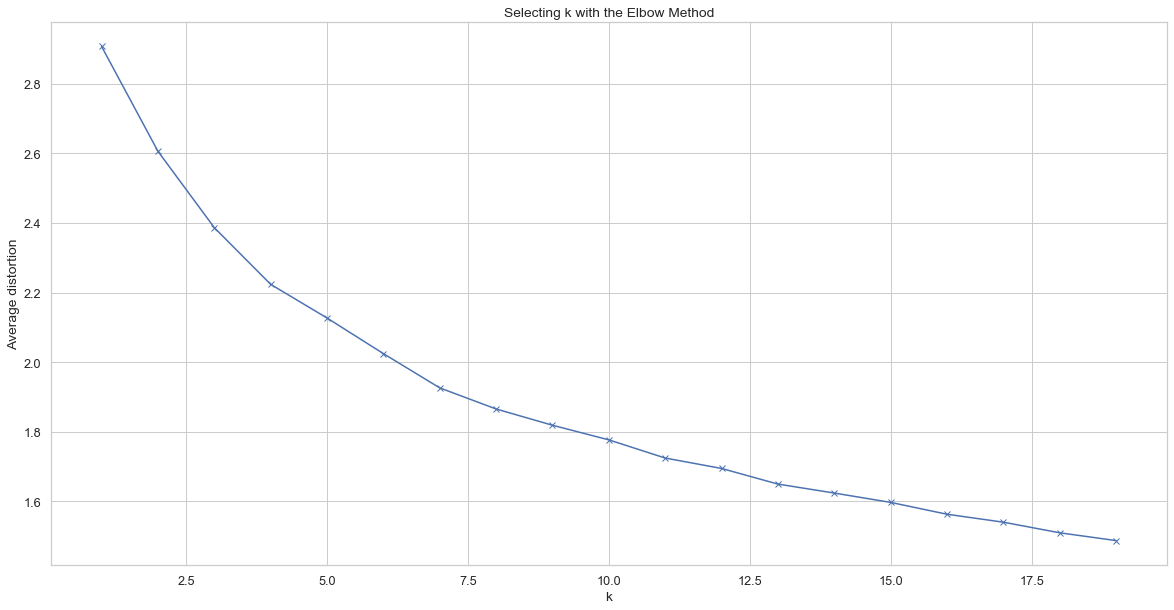

In [52]:
plt.figure(figsize=(20,10))
plt.plot(clusters, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

- Thus by using Elbow method , We could say , We might have 3 clusters 

## Implementing K-Mean clustering ( k value as 3 )

In [53]:
final_model=KMeans(n_clusters=3)
final_model.fit(df)
pred_a=final_model.predict(df)
df['Label']=pred_a

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017044D613C8>,
      dtype=object)

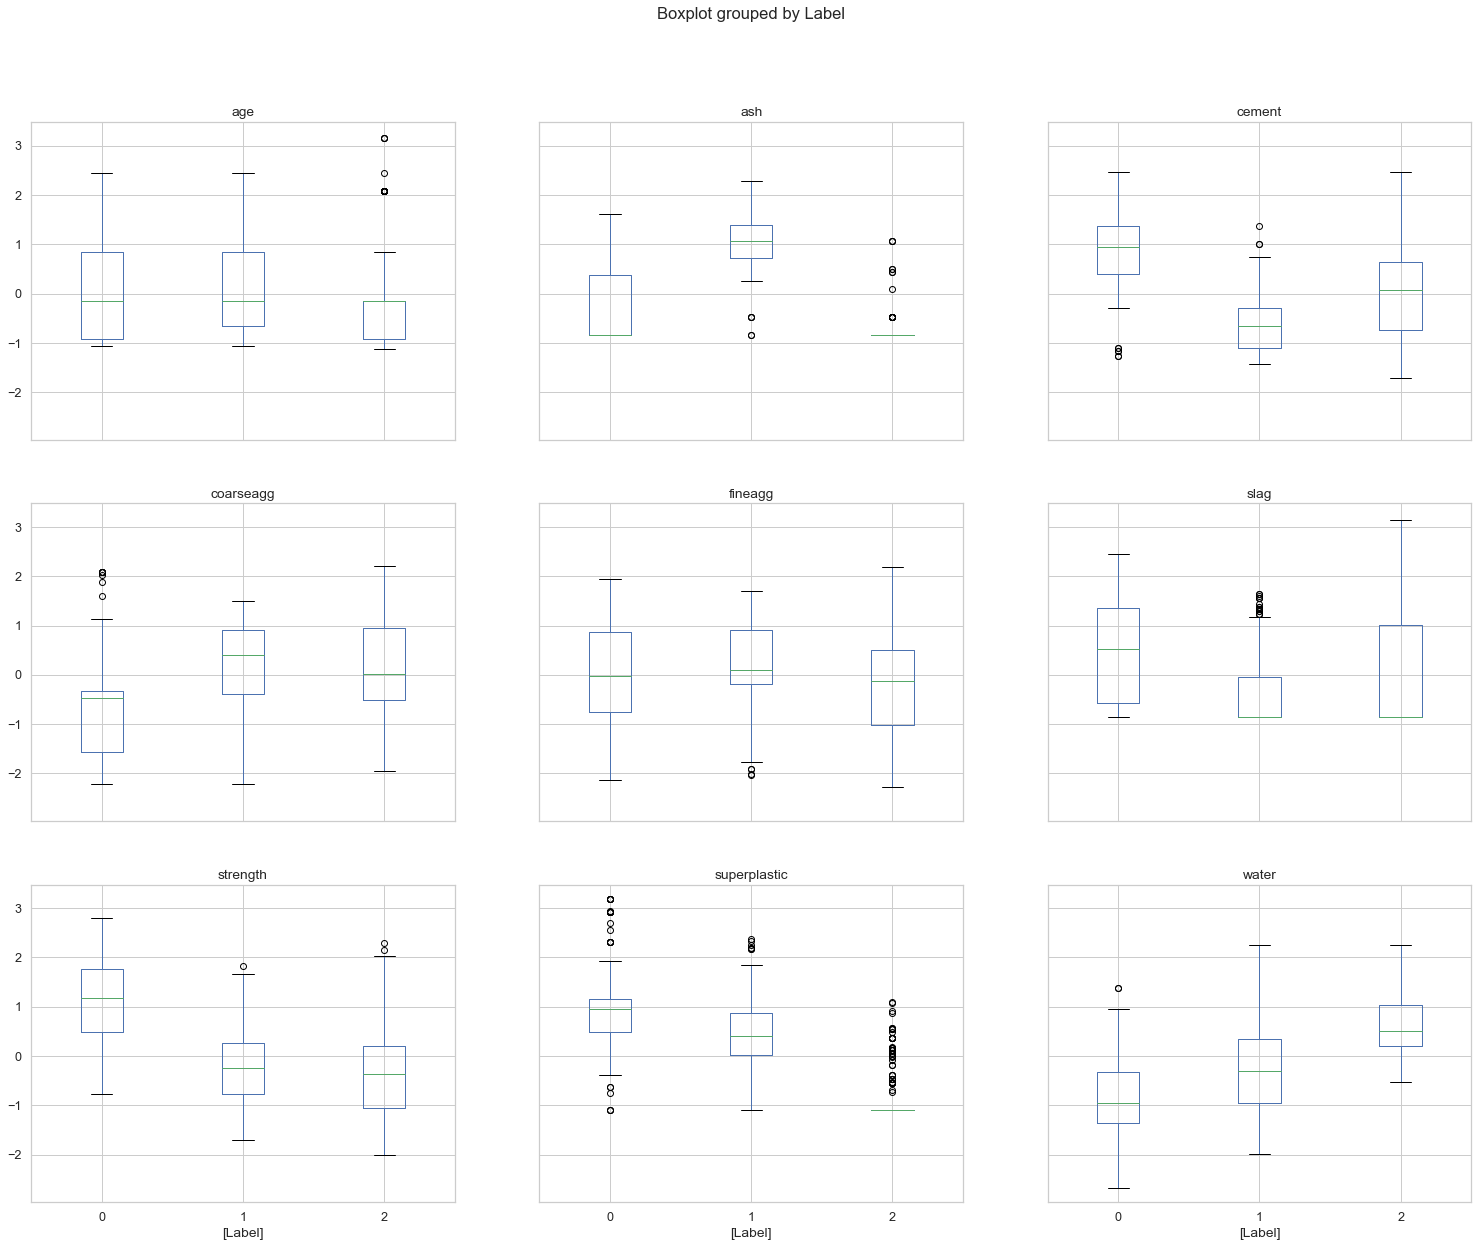

In [54]:
df.boxplot(by='Label',layout = (3,3),figsize=(25,20),)

- From analysis we found that we have 3 clusters present in the dataset.
- Therefore for every cluster all values are found in same range of values.So, none of the attributes are the good predictors for the target variable

|COLUMNS|CLUSTER 1|CLUSTER 2|CLUSTER3|
| --- | --- | --- | --- |
|AGE|normal|normal|high
|  |  |  |  |
|ASH|low|normal|low|
|  |  |  |  |
|CEMENT|average|low|average|
|  |  |  |  |
|COARSEAGG|low|average|average|
|  |  |  |  |
|FINEAGG|high|average|average|
|  |  |  |  |
|SLAG|average|low|high|
|  |  |  |  |
|SUPERPLASTIC|high|average|low|
|  |  |  |  |
|WATER|low|average|high|
|  |  |  |  |
|STRENGTH|high|average|average|


In [55]:
### taking bakcup 2
df2=df.copy(deep=True)

## Model Peformance Report

In [56]:
print('--------------Accuracy of various model:----------------------------')
print()
print('Accuracy score for Gradient BOost Regressor is :',r2_score(y_test_d,y_pred_gb))
print('Accuracy score for Gradient BOost Regressor with k-fold is :',np.mean(abs(results1)))
print('Accuracy for Random Forest Regresosr is :',r2_score(y_test_d,y_pred_rf))
print('Accuracy for AdaBoost Regressor is:',r2_score(y_test_d,y_pred_ab))
print('Accuracy for Bagging Regressor is :',r2_score(y_test_d,y_pred_bg))
print('Accuracy for decision tree with pruning is :',r2_score(y_test_d,y_pred_dt_p))
print('Accuracy for Support Vector Regressor is :',r2_score(y_test_d,y_pred_sr))

--------------Accuracy of various model:----------------------------

Accuracy score for Gradient BOost Regressor is : 0.8991413462263206
Accuracy score for Gradient BOost Regressor with k-fold is : 0.8994205185345697
Accuracy for Random Forest Regresosr is : 0.8613268107318813
Accuracy for AdaBoost Regressor is: 0.8000779949186625
Accuracy for Bagging Regressor is : 0.8730698149081262
Accuracy for decision tree with pruning is : 0.8482321662910645
Accuracy for Support Vector Regressor is : 0.7234273307674843


- comparing all accuracy scores , we have gradient boost regressor doing well.
- But as per project requirement , random forest is also taken into consideration for further proceedings

### Performing Random searchcv and Grid searchcv for further Performance tuning

In [57]:
## Gridsearch CV for gradient boost algorithm
param_grid = {'n_estimators': [500,300],
              'learning_rate':[0.1,1],
              'min_samples_split':[2,4],
              'min_samples_leaf':[4,6,8],
              'alpha':[0.3,0.5,0.9],
              'max_features':[None,2] }
gs = GridSearchCV(gb,param_grid,cv=10)
gs.fit(x_train_d, y_train_d)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                             

In [58]:
gs.best_params_

{'alpha': 0.3,
 'learning_rate': 0.1,
 'max_features': 2,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 500}

In [59]:
gb_grid=GradientBoostingRegressor(alpha= 0.3,learning_rate= 0.1,max_features= 2,min_samples_leaf= 8,min_samples_split= 2,n_estimators= 500,random_state=1)
gb_grid.fit(x_train_d,y_train_d)
print('Training score :',gb_grid.score(x_train_d,y_train_d))
print('Test score :',gb_grid.score(x_test_d,y_test_d))

Training score : 0.9753365334255569
Test score : 0.9150449858143891


- Therefore with help of grid searchcv method we have raised our model performance to 2 % higher for gradient boost algorithm.

In [60]:
## Randomsearch CV for gradient boost algorithm
param_dist = {'n_estimators': [500,300,700],
              'learning_rate':[0.1,0.5,1],
              'min_samples_split':sp_randint(2, 11),
              'min_samples_leaf':sp_randint(2, 11),
              'alpha':[0.3,0.5,0.9,0.7],
              'max_features':sp_randint(1, 8),
              'criterion':['friedman_mse','mse','mae']}
randomCV = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=10,cv=10)
randomCV.fit(x_train_d,y_train_d)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                           

In [61]:
randomCV.best_params_

{'alpha': 0.5,
 'criterion': 'mse',
 'learning_rate': 0.1,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 700}

In [62]:
gb_rand=GradientBoostingRegressor(alpha= 0.9, criterion= 'friedman_mse', learning_rate= 0.1, max_features= 5, min_samples_leaf= 9, min_samples_split= 3, n_estimators= 500,random_state=1)
gb_rand.fit(x_train_d,y_train_d)
print('Training score :',gb_rand.score(x_train_d,y_train_d))
print('Test score :',gb_rand.score(x_test_d,y_test_d))

Training score : 0.9771693339114916
Test score : 0.9206643612520087


- Therefore with help of randomsearchcv we raised our model performance further to 92 %

### Performing Tuning for RandomForest algorithm

In [63]:
## Gridsearch CV -->  estimated run time 10 mins
param_grid= {"max_depth": [3, None],
              "max_features": [2,4,],
              "min_samples_split": [2,5],
              "bootstrap": [True, False],
              "criterion": ['mse','mae'],
              'n_estimators':[300,500]}
gs = GridSearchCV(rf,param_grid,cv=5)
gs.fit(x_train_d, y_train_d)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
       

In [64]:
gs.best_params_

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [65]:
rf_grid=RandomForestRegressor(bootstrap= False,criterion= 'mae',max_depth= None,max_features= 4,min_samples_split= 2,n_estimators= 300,random_state=1)
rf_grid.fit(x_train_d,y_train_d)
print('Training score :',rf_grid.score(x_train_d,y_train_d))
print('Test score :',rf_grid.score(x_test_d,y_test_d))

Training score : 0.9939554234209923
Test score : 0.8938835055027611


- Hence we could see , we have raised the performance from 87 % to 89 % using gridsearchCV for randomforest regressor

In [66]:
### random searchcv
param_dist = {"max_depth": [3,5,None],
              "max_features": sp_randint(1, 7),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ['mse','mae'],
              "n_estimators":[300,500]}
randomCV = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10,cv=5)
randomCV.fit(x_train_d,y_train_d)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [67]:
randomCV.best_params_

{'bootstrap': False,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 3,
 'min_samples_split': 3,
 'n_estimators': 300}

In [68]:
rf_rand=RandomForestRegressor(bootstrap= False, criterion= 'mse', max_depth= None, max_features= 2, min_samples_split= 6, n_estimators= 300,random_state=1)
rf_rand.fit(x_train_d,y_train_d)
print('Training score :',rf_rand.score(x_train_d,y_train_d))
print('Test score :',rf_rand.score(x_test_d,y_test_d))

Training score : 0.9782067552095778
Test score : 0.8769594315417886


- Hence with help of randsearchCV we could able to get same score of 87 %.

### Considering this model as our final modle. Now we will test our original test data (unseen dataset) with this models and evaluate the test score

In [69]:
print('Test score :',np.round(gb_rand.score(x_test,y_test)*100,2),'%')

Test score : 92.34 %


- There with unseen new data, gradientboost Regresssor gives around 92 % accuracy.

In [70]:
print('Test score :',np.round(rf_grid.score(x_test,y_test)*100,2),'%')

Test score : 91.31 %


- There with unseen new data , RandomForest Regressor gives around 91 % accuracy

## Boostraping Implementation

In [71]:
df_XY = X.join(y)
df_z=pd.DataFrame(df_z,columns=df.columns)

In [72]:
### Gradient Boost algorithm
values = df_XY.values
n_iterations = 1000        
n_size = int(len(df_z) * 1)    

stats = list()   
for i in range(n_iterations):
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    gb = GradientBoostingRegressor(n_estimators=50)
    gb.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    
    score = gb.score(test[:, :-1] , y_test)
    predictions = gb.predict(test[:, :-1])  
    stats.append(score)

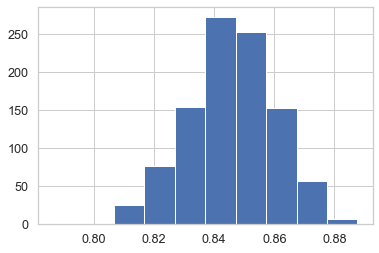

95.0 confidence interval 81.5% and 87.1%


In [73]:
# For 95% confidence 
pyplot.hist(stats)
pyplot.show()
alpha = 0.95                             
p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

- Therefore with 95 % confidence Interval our model performance between 81 % to 87 %

In [74]:
### For Random Forest Regressor
stats = list()   
for i in range(n_iterations):
    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()]) 
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    
    score = rf.score(test[:, :-1] , y_test)
    predictions = rf.predict(test[:, :-1])  
    stats.append(score)

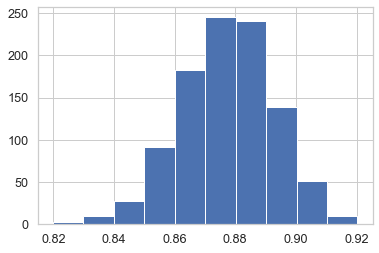

95.0 confidence interval 84.5% and 90.5%


In [75]:
pyplot.hist(stats)
pyplot.show()
alpha = 0.95                             
p = ((1.0-alpha)/2.0) * 100             
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

- Therefore with 95 % confidence Interval our model performance between 84 % to 90 %

## CONCLUSION

- Hence for given particular dataset, GrandientBoost Regressor and RandomForest Regressor does well.
- We have seen the peformace range for both algorithms with 95% confidence Interval.